In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#Input the csv file after imputation.
newpizza = pd.read_csv("/content/newpizzadata.csv")

In [3]:
newpizza.describe()

,Unnamed: 0,latitude,longitude,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax,average_price
count,3510.00000,3510.000000,3510.000000,3510.000000,3510.000000,1557.000000,1557.000000,3510.000000
mean,1754.50000,38.555114,-87.472055,12.482742,11.431106,15.597945,36.566474,11.956924
std,1013.39405,4.651092,16.430008,12.277341,6.653145,18.495854,21.737839,8.403799
min,0.00000,18.411826,-157.837461,0.250000,0.250000,0.000000,12.000000,0.250000
25%,877.25000,35.769852,-94.202573,8.000000,7.990000,0.000000,30.000000,8.000000
50%,1754.50000,40.020710,-81.675414,12.479186,11.427849,25.000000,40.000000,11.953518
75%,2631.75000,41.455179,-74.743820,14.990000,13.990000,25.000000,40.000000,14.490000
max,3509.00000,64.854370,-66.024871,312.950000,118.990000,347.000000,666.000000,161.950000


In [4]:
newpizza.head()

,Unnamed: 0,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,...,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,average_price
0,0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,...,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,19.00
1,1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,...,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,18.95
2,2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood,12.00
3,3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood,13.00
4,4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood,13.00


In [5]:
#Obtain the interested imformation.
pizza=newpizza[["id","menus.name","menus.amountMax","menus.amountMin","average_price"]]
pizza.head()

,id,menus.name,menus.amountMax,menus.amountMin,average_price
0,AVwc_6KEIN2L1WUfrKAH,Bianca Pizza,22.50,15.50,19.00
1,AVwc_6KEIN2L1WUfrKAH,Cheese Pizza,18.95,18.95,18.95
2,AVwc_6qRByjofQCxkcxw,"Pizza, Margherita",12.00,12.00,12.00
3,AVwc_6qRByjofQCxkcxw,"Pizza, Mushroom",13.00,13.00,13.00
4,AVwc_6qRByjofQCxkcxw,"Pizza, Puttenesca",13.00,13.00,13.00


In [6]:
pizza.info()##View the variables namesinformation. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3510 non-null   object 
 1   menus.name       3510 non-null   object 
 2   menus.amountMax  3510 non-null   float64
 3   menus.amountMin  3510 non-null   float64
 4   average_price    3510 non-null   float64
dtypes: float64(3), object(2)
memory usage: 137.2+ KB


In [7]:
#Dropping the outliers. (Like what we have done in "Data Processing/0_2 Detect Outlier .ipynb")
Q1=np.quantile(newpizza['average_price'],0.25)
Q3=np.quantile(newpizza['average_price'],0.75)
lowerlimit=Q1-1.5*(Q3-Q1)
upperlimit=Q3+1.5*(Q3-Q1)
non_outlier_pizza=newpizza[newpizza['average_price']<upperlimit]

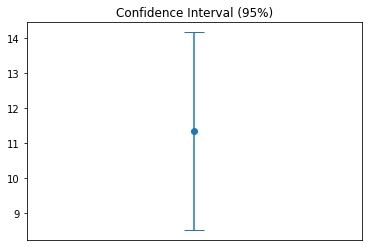

Confidence Interval of pizza average price: [8.53, 14.18]


In [8]:
# Calculate the sample mean and standard deviation
non_outlier_pizza_mean=non_outlier_pizza["average_price"].mean()
non_outlier_pizza_std=non_outlier_pizza["average_price"].std(ddof=1)

# Set the confidence level and degrees of freedom
confidence_level = 0.95
n = len("average_price")
df = n - 1

# Calculate the t-value
t_value = stats.t.ppf((1 + confidence_level) /2, df)

# Calculate the standard error of the mean
sem = non_outlier_pizza_std / np.sqrt(n)

# Calculate the margin of error and confidence interval
margin_of_error = t_value * sem
ci_lower = non_outlier_pizza_mean - margin_of_error
ci_upper = non_outlier_pizza_mean + margin_of_error

# Create the graph
plt.errorbar(0, non_outlier_pizza_mean, yerr=margin_of_error, fmt='o', capsize=10)
plt.xlim(-1, 1)
plt.xticks([])
plt.title("Confidence Interval ({}%)".format(int(confidence_level * 100)))
plt.show()

# Print the results
print("Confidence Interval of pizza average price: [{:.2f}, {:.2f}]".format(ci_lower, ci_upper))

In [9]:
#Drop the duplicates data when the id & pizza names are same at the time.
pizza_sub = non_outlier_pizza.drop_duplicates(subset=['id', 'menus.name'])
#Count the type of pizza
names_of_pizza = pizza_sub['menus.name'].value_counts()
names_of_pizza

Cheese Pizza                            130
White Pizza                              74
Margherita Pizza                         60
Pizza                                    57
Hawaiian Pizza                           52
                                       ... 
Naan Pizza 1                              1
White Pizza With Broccoli Rabe            1
White Pizza With Broccoli or Spinach      1
Wood Oven Pizza                           1
Steak Pizzaiola                           1
Name: menus.name, Length: 1572, dtype: int64

In [10]:
# Drop duplicates
pizza_sub = non_outlier_pizza.drop_duplicates(subset=['id', 'menus.name'])

# Count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts()

# Merge `names_of_pizza` to `pizza_sub`
pizza_sub = pd.merge(pizza_sub, names_of_pizza.to_frame(),
                     left_on='menus.name', right_index=True, how='left')
names_of_pizza.head(10)

Cheese Pizza             130
White Pizza               74
Margherita Pizza          60
Pizza                     57
Hawaiian Pizza            52
Pizza Burger              49
Buffalo Chicken Pizza     44
Pepperoni Pizza           41
Bbq Chicken Pizza         37
Veggie Pizza              33
Name: menus.name, dtype: int64

In [11]:
# Get the 10 most common types of pizza
top_pizzas = names_of_pizza.head(10).index

# Set the confidence level and degrees of freedom
confidence_level = 0.95
n = len(non_outlier_pizza)

# Loop through each of the top pizzas and calculate the confidence interval
for pizza_type in top_pizzas:
    # Get the sample data for the current pizza type
    sample = non_outlier_pizza[non_outlier_pizza["menus.name"] == pizza_type]["average_price"]
    
    # Calculate the sample mean and standard deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    
    # Calculate the t-value
    df = len(sample) - 1
    t_value = stats.t.ppf((1 + confidence_level) / 2, df)
    
    # Calculate the standard error of the mean
    sem = sample_std / np.sqrt(n)
    
    # Calculate the margin of error and confidence interval
    margin_of_error = t_value * sem
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    # Print the results for the current pizza type
    print("{}: {:.2f} +/- {:.2f} ({}% CI: [{:.2f}, {:.2f}])".format(pizza_type, sample_mean, margin_of_error, int(confidence_level * 100), ci_lower, ci_upper))


Cheese Pizza: 9.75 +/- 0.12 (95% CI: [9.62, 9.87])
White Pizza: 12.69 +/- 0.11 (95% CI: [12.58, 12.81])
Margherita Pizza: 12.37 +/- 0.11 (95% CI: [12.27, 12.48])
Pizza: 8.78 +/- 0.12 (95% CI: [8.66, 8.90])
Hawaiian Pizza: 13.36 +/- 0.14 (95% CI: [13.22, 13.51])
Pizza Burger: 6.30 +/- 0.08 (95% CI: [6.22, 6.39])
Buffalo Chicken Pizza: 13.43 +/- 0.12 (95% CI: [13.31, 13.55])
Pepperoni Pizza: 10.74 +/- 0.12 (95% CI: [10.62, 10.85])
Bbq Chicken Pizza: 13.55 +/- 0.11 (95% CI: [13.44, 13.67])
Veggie Pizza: 13.51 +/- 0.17 (95% CI: [13.34, 13.68])
